### Find SVD for the matrix A then find it's Pseeudoinverse:
$$\begin{bmatrix} 7 & 2 \\ 3 & 4 \\ 5 & 3 \end{bmatrix}$$

In [51]:
import numpy as np
import matplotlib.pyplot as plt

In [38]:
A = np.array([[7,2],
              [3,4],
              [5,3]])
U,D,Vtrans = np.linalg.svd(A)

In [39]:
Vtrans

array([[-0.88033817, -0.47434662],
       [ 0.47434662, -0.88033817]])

In [40]:
U

array([[-0.69366543,  0.59343205, -0.40824829],
       [-0.4427092 , -0.79833696, -0.40824829],
       [-0.56818732, -0.10245245,  0.81649658]])

In [41]:
# A+ = V . D+ . U.T
# 1. get D+
D = np.diag(D)
D_inv = np.linalg.inv(D)
D_plus = np.concatenate((D_inv,np.array([[0]*D.shape[0]]).T), axis=1)

In [42]:
D_plus

array([[0.0975474 , 0.        , 0.        ],
       [0.        , 0.38046613, 0.        ]])

In [43]:
# 2. get A+
A_plus = Vtrans.T @ D_plus @ U.T

In [44]:
A_plus

array([[ 0.16666667, -0.10606061,  0.03030303],
       [-0.16666667,  0.28787879,  0.06060606]])

### Use np.linalg.pinv(A) and compare the results

In [46]:
np.linalg.pinv(A)

array([[ 0.16666667, -0.10606061,  0.03030303],
       [-0.16666667,  0.28787879,  0.06060606]])

### Multiply A+ and  A. See if the result is close to the Identity matrix

In [47]:
A_plus @ A

array([[1.00000000e+00, 2.70616862e-16],
       [2.28983499e-16, 1.00000000e+00]])

### Multiply A and A+. Notice the result
- A difference with the real inverse is that A+A is approximate I. However AA+ is not

In [48]:
A @ A_plus

array([[ 0.83333333, -0.16666667,  0.33333333],
       [-0.16666667,  0.83333333,  0.33333333],
       [ 0.33333333,  0.33333333,  0.33333333]])

### Using the pseudoinverse to solve a overdetermined system of linear equations
- In general there is no solution to overdetermined systems.
- In the following picture, there is no point at the intersection of the three lines corresponding to three equations:
![image.png](attachment:image.png)

### Use pseudoinverse to find the approximate solution of the following system of linear equations:
#### -2x1 - x2 = -2 , 4x1 - x2 = -8 , -x1 - x2 =-2

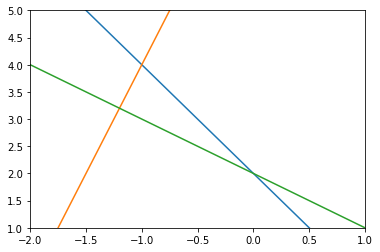

In [52]:
x1 = np.linspace(-5, 5, 1000)
x2_1 = -2*x1 + 2
x2_2 = 4*x1 + 8
x2_3 = -1*x1 + 2

plt.plot(x1, x2_1)
plt.plot(x1, x2_2)
plt.plot(x1, x2_3)
plt.xlim(-2., 1)
plt.ylim(1, 5)
plt.show()

In [54]:
A = np.array([[-2, -1],
              [ 4, -1],
              [-1, -1]])

y = np.array([[-2, -8, -2]]).T

U,D,Vtrans = np.linalg.svd(A)
# 1. get D+
D = np.diag(D)
D_inv = np.linalg.inv(D)
D_plus = np.concatenate((D_inv,np.array([[0]*D.shape[0]]).T), axis=1)
# 2. get A+
A_plus = Vtrans.T @ D_plus @ U.T

In [55]:
A_plus

array([[-0.11290323,  0.17741935, -0.06451613],
       [-0.37096774, -0.27419355, -0.35483871]])

In [59]:
res =   A_plus @ y
res

array([[-1.06451613],
       [ 3.64516129]])

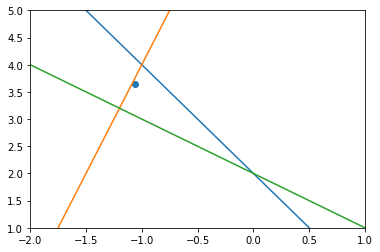

In [60]:
plt.plot(x1, x2_1)
plt.plot(x1, x2_2)
plt.plot(x1, x2_3)
plt.xlim(-2., 1)
plt.ylim(1, 5)

plt.scatter(res[0], res[1])

plt.show()